In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [11]:
covid=r"C:\Users\aashutosh kumar\Music\CORONA\COVID"
non_covid=r"C:\Users\aashutosh kumar\Music\CORONA\non-COVID"

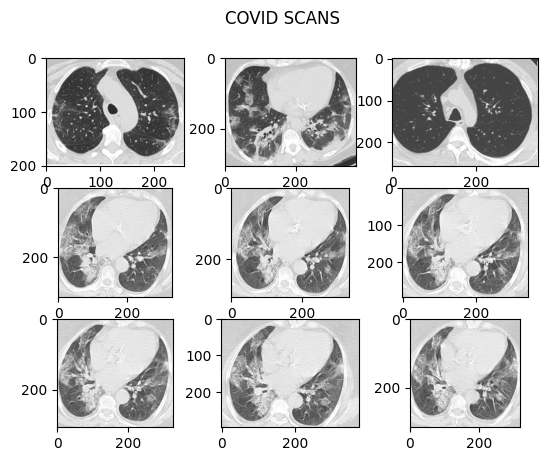

In [12]:
for i, filename in enumerate(os.listdir(covid)[:9], 1):
    plt.subplot(3, 3, i)
    path = os.path.join(covid, filename)
    image = plt.imread(path)
    plt.imshow(image)

plt.suptitle("COVID SCANS")
plt.show()

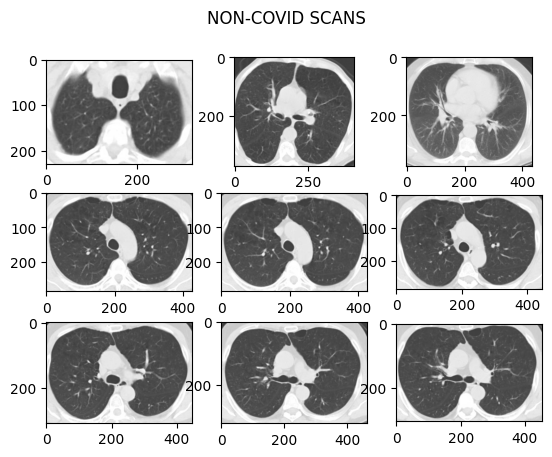

In [14]:
for i,filename in enumerate(os.listdir(non_covid)[:9],1):
    plt.subplot(3,3,i)
    path=os.path.join(non_covid,filename)
    img=plt.imread(path)
    plt.imshow(img)

plt.suptitle("NON-COVID SCANS")
plt.show()

In [21]:
train_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\CORONA",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    subset="training",
    validation_split=0.2,
    seed=123
)

val_data=keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\aashutosh kumar\Music\CORONA",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150),
    subset="validation",
    validation_split=0.2,
    seed=123
)

Found 2481 files belonging to 2 classes.
Using 1985 files for training.
Found 2481 files belonging to 2 classes.
Using 496 files for validation.


In [23]:
def norm(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(norm)
val_data=val_data.map(norm)

In [27]:
vgg=VGG16(include_top=False,weights="imagenet",input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [31]:
vgg.trainable=False
model=Sequential()

model.add(vgg)
model.add(Flatten())

model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(metrics=["accuracy"],loss="binary_crossentropy",optimizer="Adam")

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               819300    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 50)               

In [33]:
h=model.fit(train_data,epochs=40,validation_data=val_data)

Epoch 1/40
63/63 [==============================] - 23s 164ms/step - loss: 0.7460 - accuracy: 0.5421 - val_loss: 0.5944 - val_accuracy: 0.7177
Epoch 2/40
63/63 [==============================] - 7s 112ms/step - loss: 0.5659 - accuracy: 0.7123 - val_loss: 0.4687 - val_accuracy: 0.7782
Epoch 3/40
63/63 [==============================] - 7s 116ms/step - loss: 0.4812 - accuracy: 0.7678 - val_loss: 0.3801 - val_accuracy: 0.8145
Epoch 4/40
63/63 [==============================] - 7s 113ms/step - loss: 0.4311 - accuracy: 0.7950 - val_loss: 0.3929 - val_accuracy: 0.7823
Epoch 5/40
63/63 [==============================] - 7s 114ms/step - loss: 0.4153 - accuracy: 0.8010 - val_loss: 0.2609 - val_accuracy: 0.8891
Epoch 6/40
63/63 [==============================] - 7s 112ms/step - loss: 0.3825 - accuracy: 0.8166 - val_loss: 0.2588 - val_accuracy: 0.8851
Epoch 7/40
63/63 [==============================] - 7s 113ms/step - loss: 0.3444 - accuracy: 0.8413 - val_loss: 0.2903 - val_accuracy: 0.8669
Epoch

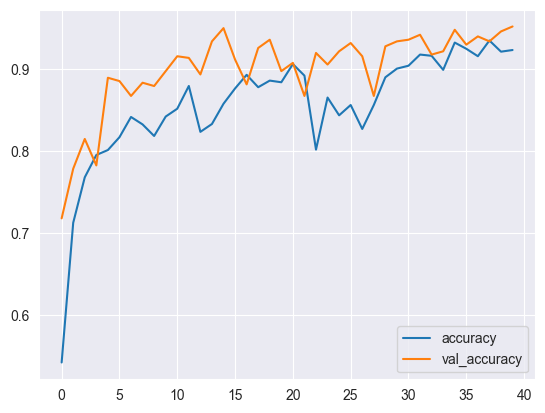

In [34]:
sns.set_style("darkgrid")
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

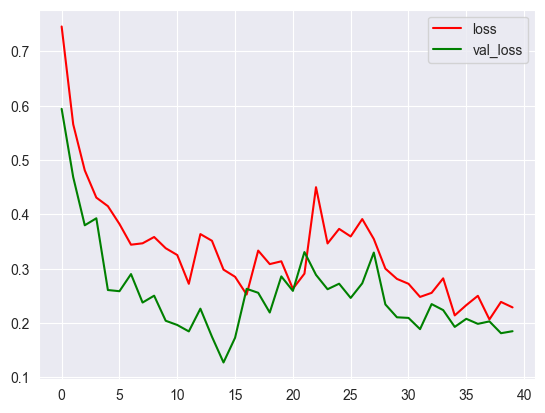

In [39]:
sns.set_style("darkgrid")
plt.plot(h.history["loss"],color="red")
plt.plot(h.history["val_loss"],color="green")
plt.legend(["loss","val_loss"])

In [56]:
img=cv2.imread(r"C:\Users\aashutosh kumar\Downloads\C.jpeg")
img=cv2.resize(img,(150,150))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [52]:
input=img.reshape(1,150,150,3)

TypeError: Invalid shape (1, 150, 150, 3) for image data

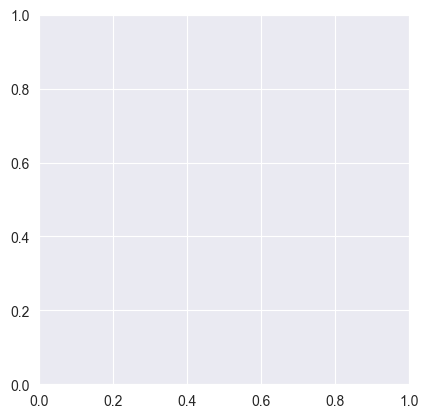

In [53]:
plt.imshow(img)

In [54]:
input.shape

(1, 150, 150, 3)

In [55]:
res=model.predict(input)
if res<0.5:
    print("COVID")
else:
    print("non covid")

1/1 [==============================] - 0s 27ms/step
COVID
